# <p align=center> Produire une étude de marché avec Python 1/2 <p>

## <p align=center> Préparation, Nettoyage et Analyse Exploratoire <p>

Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

<p align=center><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt="Logo Poule Qui Chante" width="500" title=""><p>



Afin de réaliser l'étude de marché demandé, nous commençerons par la préparation des données, leur nettoyage et une première analyse exploratoire.


In [1]:
#Import des librairies

#Librairies pour le traitement des données
import pandas as pd
import numpy as np

# Librairies de visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")

#Test de corrélation de Pearson
import scipy.stats as st
from scipy.stats import pearsonr 

# Librairie qui gère les warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
#Définition des fonctions utilisées

#Nettoyage des données
separateur = "-----------------------------------"
def Nettoyage (df):
    print(df.head(2))
    print(separateur)
    print("Shape")
    print(df.shape)
    print(separateur)
    print("Types")
    print(df.dtypes)
    print(separateur)
    print("Valeurs Nulles")
    print(df.isnull().sum())
    print(separateur)
    print("Valeurs uniques")
    print(df.nunique())
    print(separateur)
    print(df.describe())
    return

#Fonction de description des valeurs manquantes
def valeurs_manquantes(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

#Fonction de vérification des doublons
def Doublons(df,pk): #Analyse des doublons
    print(df.loc[df[pk].duplicated(keep=False),:])
    return

#Analyse univariée
def univariée(df,col):
    # Visualisation en Boxplot
    plt.figure(figsize=(10,3))
    sns.boxplot(df,x=df[col])
    plt.title(f"Distribution : {col}")
    plt.show()
    print('\n')
    #Valeurs remarquables
    print(f"Valeur minimale : {df[col].min()}")
    print(f"Valeur maximale : {df[col].max()}")
    print(f"Moyenne : {df[col].mean()})")
    print(f"Médiane : {df[col].std()}")
    print('\n')
    #Détéction des outliers
    #1er quartile
    q1 = df[col].quantile(0.25)
    #3eme quartile
    q3 = df[col].quantile(0.75)
    #écart interquatile
    iqr = q3 - q1
    print('Ecart interquatile =', round(iqr,2))
    seuil_min = q1 -(1.5 * iqr) 
    seuil_max = q3 +(1.5 * iqr)
    print('Seuil minimum =', round(seuil_min,2))
    print('Seuil maximum =', round(seuil_max,2))
    #dataframe des outliers
    dfo = df[(df[col] < seuil_min) | (df[col] > seuil_max)]
    #liste des outliers
    liste_out=dfo.index
    print("Nombre d'outliers:", len(liste_out))
    print(dfo.index.tolist())
    print(separateur)
    
    #Test de Normalité de Shapiro-Wilk
    stat, p = st.shapiro(df[col])
    print(f"HO du test de Shapiro-Wilk : la variable {col} suit une distribution normale")
    print(f"Stat : {stat}")
    
    alpha = 0.05 # niveau de signification
    print(f"P-value =  {p}")
    if p > alpha:
        print("Acceptation de H0")
    else:
        print("Rejet de H0")
    return


# Analyse bivariée
def bivariée(df,col1,col2):
    #Enlève les valeurs nulles pour les 2 variables concernées
    dfb = df.copy()
    dfb.fillna(value=0, inplace=True)
    #Scatterplot avec les 2 variables
    sns.scatterplot(dfb,x=df[col1],y=df[col2])
    sns.set(rc={"figure.figsize":(10, 10)})
    plt.yscale('log')
    paysliste=dfb.index
    for i, paysliste in enumerate (paysliste):
         plt.annotate(paysliste, (dfb[col1][i], dfb[col2][i]) )
    plt.title(f"Scatterplot entre les variables {col1} et {col2}")
    plt.show()
    #Test de Corrélation de Pearson
    stat, p = st.pearsonr(dfb[col1],dfb[col2])
    print(f"HO du test de Person : le coefficient de corrélation n'est pas significativement différent de zéro (il n'y a pas de relation linéaire) entre {col1} et {col2}")
    print(f"Corr : {stat}")
    
    alpha = 0.1 # niveau de signification
    print(f"P-value =  {p}")
    if p > alpha:
        print("Acceptation de H0")
    else:
        print("Rejet de H0")
    return
    
    
    
    

In [3]:
#Choix de l'année de référence pour l'étude
Annee = 2017

## 1. Préparation et Nettoyage des données

### 1.1. Données fournies par l'entreprise

In [4]:
population = pd.read_csv('Population_2000_2018.csv')
disponibilité = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [5]:
Nettoyage(population)

  Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
-----------------------------------
Shape
(4411, 15)
-----------------------------------
Types
Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément             

In [6]:
Nettoyage(disponibilité)

  Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                  Élément  Code Produit          Produit  \
0          5511               Production          2511  Blé et produits   
1          5611  Importations - Quantité          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
-----------------------------------
Shape
(176600, 14)
-----------------------------------
Types
Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    obje

#### 1.1.1. Préparation des données concernant la Population

In [7]:
#On séléctionne la population pour l'année de l'étude
pop2017 = population.loc[(population['Année']==Annee)]
pop2017 = pop2017[["Zone", "Valeur"]]
#Passage de la valeur en unité plutôt qu'en milliers
pop2017["Valeur"] = round(pop2017["Valeur"]*1000)
pop2017.rename(columns={"Valeur":"Population"}, inplace=True)

In [8]:
Nettoyage(pop2017)

              Zone  Population
17     Afghanistan  36296113.0
36  Afrique du Sud  57009756.0
-----------------------------------
Shape
(236, 2)
-----------------------------------
Types
Zone           object
Population    float64
dtype: object
-----------------------------------
Valeurs Nulles
Zone          0
Population    0
dtype: int64
-----------------------------------
Valeurs uniques
Zone          236
Population    236
dtype: int64
-----------------------------------
         Population
count  2.360000e+02
mean   3.198362e+07
std    1.318949e+08
min    7.930000e+02
25%    3.803032e+05
50%    5.203510e+06
75%    1.930842e+07
max    1.421022e+09


In [9]:
Doublons(pop2017,'Zone')

Empty DataFrame
Columns: [Zone, Population]
Index: []


In [10]:
# Calcul de l'évolution de la population sur les 5 dernières années
population_pivot = population[["Zone","Année", "Valeur"]]
population_evol =  population_pivot.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur' , aggfunc='sum')
population_evol = population_evol[[Annee-4,Annee]]
population_evol['Evolution de la population 2013-2017']=(population_evol[Annee]-population_evol[Annee-4])/population_evol[Annee]*100
population_evol.drop(columns=[Annee-4,Annee], inplace=True)

In [11]:
Nettoyage(population_evol)

Année           Evolution de la population 2013-2017
Zone                                                
Afghanistan                                11.093541
Afrique du Sud                              5.828187
-----------------------------------
Shape
(238, 1)
-----------------------------------
Types
Année
Evolution de la population 2013-2017    float64
dtype: object
-----------------------------------
Valeurs Nulles
Année
Evolution de la population 2013-2017    2
dtype: int64
-----------------------------------
Valeurs uniques
Année
Evolution de la population 2013-2017    236
dtype: int64
-----------------------------------
Année  Evolution de la population 2013-2017
count                            236.000000
mean                               4.574171
std                                4.742952
min                              -14.522869
25%                                1.467765
50%                                4.107108
75%                                8.000051
max         

#### 1.1.2. Préparation des données concernant la Disponibilité

In [12]:
#On sélectionne les colonnes utiles
disponibilité = disponibilité[["Zone","Élément","Produit","Valeur"]]
#On sélectionne uniquement les Elements 'Viande de Volailles'
dispo_poulet = disponibilité.loc[(disponibilité['Produit']=='Viande de Volailles')]
#On pivote afin d'avoir les différents éléments en colonnes par pays
dispo = dispo_poulet.pivot_table(index = 'Zone', columns = 'Élément', values = 'Valeur' , aggfunc='sum')


In [13]:
Nettoyage(dispo)

Élément         Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                 
Afghanistan                             NaN                    NaN   
Afrique du Sud                          0.0                    NaN   

Élément         Autres utilisations (non alimentaire)  \
Zone                                                    
Afghanistan                                       NaN   
Afrique du Sud                                    NaN   

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   

Élément         Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afr

#### 1.1.3. Fusion, nettoyage et calcul de données fournies par l'entreprise

In [14]:
# Fusion des 2 tables fournies
dispo = pd.merge(dispo,pop2017, on = 'Zone', how = 'left')
dispo = pd.merge(dispo,population_evol, on = 'Zone', how = 'left')

dispo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

In [15]:
dispo_null = dispo[dispo.isnull().any(axis=1)]
dispo_null

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population,Evolution de la population 2013-2017
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,36296113.0,11.093541
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,57009756.0,5.828187
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,2884169.0,-0.680300
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,41389189.0,7.850011
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,82658409.0,1.795391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0,9487203.0,3.049297
168,Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0,16785361.0,6.421590
169,États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0,325084756.0,2.671370
170,Éthiopie,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0,106399924.0,10.351630


In [16]:
dispo.fillna(value=0, inplace=True)

In [17]:
#Ajout d'information calculées
dispo['Autosuffisance'] = dispo['Production']/dispo['Disponibilité intérieure']*100
dispo['part Import'] = dispo['Importations - Quantité']/dispo['Disponibilité intérieure']*100


In [18]:
dispo.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population,Evolution de la population 2013-2017,Autosuffisance,part Import
0,Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,...,2.0,28.0,0.0,0.0,0.0,0.0,36296113.0,11.093541,49.122807,50.877193
1,Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,...,83.0,1667.0,0.0,0.0,0.0,0.0,57009756.0,5.828187,78.706327,24.268178
2,Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,...,0.0,13.0,0.0,0.0,0.0,4.0,2884169.0,-0.680300,27.659574,80.851064
3,Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,...,13.0,275.0,0.0,0.0,0.0,0.0,41389189.0,7.850011,99.277978,0.722022
4,Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,...,0.0,1514.0,-38.0,0.0,167.0,-29.0,82658409.0,1.795391,87.061530,48.418631


In [19]:
#Définition de la liste des pays présents dans le DF
paysliste = dispo['Zone']

In [20]:
#Sélection des colonnes d'interet
df = dispo[["Zone","Autosuffisance","part Import",'Disponibilité de protéines en quantité (g/personne/jour)',"Population","Evolution de la population 2013-2017",'Disponibilité alimentaire (Kcal/personne/jour)']]

In [21]:
#Disponibilité intérieur des protéines
proteines = disponibilité[["Zone","Élément","Produit","Valeur"]]
proteines = proteines.loc[(proteines['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)')]
prot = proteines.groupby("Zone").sum()
prot.rename(columns={"Valeur":"Dispo Prot"}, inplace=True)


In [22]:
#Calcul de la part de protéine animales dans l'alimentation
origine_animale = ["Viande de Bovins","Viande d'Ovins/Caprins","Viande de Suides","Viande de Volailles","Viande, Autre","Abats Comestible","Oeufs","Poissons Eau Douce","Perciform","Poissons Pelagique","Poissons Marins, Autres","Crustacés","Cephalopodes","Mollusques, Autres","Animaux Aquatiques Autre","Viande de Anim Aquatiq"]
prot_anim = proteines[proteines["Produit"].isin(origine_animale)]
prot_anim = prot_anim.groupby("Zone").sum()
prot_anim.rename(columns={"Valeur":"Dispo Prot Anim"}, inplace=True)

In [23]:
df= pd.merge(df,prot, on = 'Zone', how = 'left')
df= pd.merge(df,prot_anim, on = 'Zone', how = 'left')
df['Part Proteines animales']= df["Dispo Prot Anim"]/df['Dispo Prot']*100
df['Part prot Poulet'] = df["Disponibilité de protéines en quantité (g/personne/jour)"]/df['Dispo Prot']*100
#Part du poulet dans l'alimentation
df['Part Poulet'] = df['Part prot Poulet']/df["Part Proteines animales"]*100

df.drop(columns=['Disponibilité de protéines en quantité (g/personne/jour)','Dispo Prot','Dispo Prot Anim','Part prot Poulet','Part Proteines animales'], inplace=True)

In [24]:
df.head()

,Zone,Autosuffisance,part Import,Population,Evolution de la population 2013-2017,Disponibilité alimentaire (Kcal/personne/jour),Part Poulet
0,Afghanistan,49.122807,50.877193,36296113.0,11.093541,5.0,11.894273
1,Afrique du Sud,78.706327,24.268178,57009756.0,5.828187,143.0,49.163763
2,Albanie,27.659574,80.851064,2884169.0,-0.680300,85.0,23.838538
3,Algérie,99.277978,0.722022,41389189.0,7.850011,22.0,20.061100
4,Allemagne,87.061530,48.418631,82658409.0,1.795391,71.0,21.790309


### 1.2. Ajout de données supplémentaires disponibles sur le site de la FAO

#### 1.2.1. PIB et Evolution du PIB

In [25]:
#Ajout du PIB 2017
pib = pd.read_csv('pib_2013_2017.csv')
pib2017 = pib.loc[(pib['Année']==Annee)]
pib2017 = pib2017[["Zone", "Valeur"]]
pib2017.rename(columns={"Valeur":"PIB par habitant"}, inplace=True)
df = pd.merge(df,pib2017, on = 'Zone', how = 'left')
#Ajout Evolution PIB 13-17
pib_pivot = pib[["Zone","Année", "Valeur"]]
pib_pivot =  pib_pivot.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur' , aggfunc='sum')
pib_pivot = pib_pivot[[Annee-4,Annee]]
pib_pivot['Evolution du PIB 2013-2017']=(pib_pivot[Annee-4]-pib_pivot[Annee])/pib_pivot[Annee]*100
pib_pivot.drop(columns=[Annee-4,Annee], inplace=True)
df = pd.merge(df,pib_pivot, on = 'Zone', how = 'left')

#### 1.2.2. Evolution des importations et de la Consommation de Poulet

In [26]:
poulet = pd.read_csv('poulet13-17.csv')
#Ajout de l'Evolution des Imports
poulet_import = poulet.loc[(poulet['Élément']=='Importations - Quantité')]
poulet_import = poulet[["Zone","Année", "Valeur"]]
poulet_import_pivot =  poulet_import.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur' , aggfunc='sum')
poulet_import_pivot = poulet_import_pivot[[Annee-4,Annee]]
poulet_import_pivot['Evolution des importation 2013-2017']=(poulet_import_pivot[Annee-4]-poulet_import_pivot[Annee])/poulet_import_pivot[Annee]*100
poulet_import_pivot.drop(columns=[Annee-4,Annee], inplace=True)
df = pd.merge(df,poulet_import_pivot, on = 'Zone', how = 'left')
#Ajout de l'Evolution de la Consommation de Poulet
poulet_conso = poulet.loc[(poulet['Élément']=='Disponibilité alimentaire en quantité (tonnes)')]
poulet_conso = poulet_conso[["Zone","Année", "Valeur"]]
poulet_conso_pivot =  poulet_conso.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur' , aggfunc='sum')
poulet_conso_pivot = poulet_conso_pivot[[Annee-4,Annee]]
poulet_conso_pivot['Evolution de la consommation 2013-2017']=(poulet_conso_pivot[Annee-4]-poulet_conso_pivot[Annee])/poulet_conso_pivot[Annee]*100
poulet_conso_pivot.drop(columns=[Annee-4,Annee], inplace=True)
df = pd.merge(df,poulet_conso_pivot, on = 'Zone', how = 'left')

#### 1.2.3. Stabilité Politique

In [27]:
stabilite = pd.read_csv('stabilité17.csv')
stabilite = stabilite[["Zone", "Valeur"]]
stabilite.rename(columns={"Valeur":"Index Stabilité"}, inplace=True)
df = pd.merge(df,stabilite, on = 'Zone', how = 'left').set_index('Zone')

In [28]:
print("Valeurs Nulles\n",df.isnull().sum())

Valeurs Nulles
 Autosuffisance                                    2
part Import                                       2
Population                                        0
Evolution de la population 2013-2017              0
Disponibilité alimentaire (Kcal/personne/jour)    0
Part Poulet                                       0
PIB par habitant                                  2
Evolution du PIB 2013-2017                        2
Evolution des importation 2013-2017               1
Evolution de la consommation 2013-2017            1
Index Stabilité                                   5
dtype: int64


In [29]:
df.head()

,Autosuffisance,part Import,Population,Evolution de la population 2013-2017,Disponibilité alimentaire (Kcal/personne/jour),Part Poulet,PIB par habitant,Evolution du PIB 2013-2017,Evolution des importation 2013-2017,Evolution de la consommation 2013-2017,Index Stabilité
Zone,,,,,,,,,,,
Afghanistan,49.122807,50.877193,36296113.0,11.093541,5.0,11.894273,530.149831,17.344283,24.281558,4.718645,-2.80
Afrique du Sud,78.706327,24.268178,57009756.0,5.828187,143.0,49.163763,6723.928582,10.612243,-11.235664,-6.082222,-0.28
Albanie,27.659574,80.851064,2884169.0,-0.680300,85.0,23.838538,4521.752219,-2.130179,27.708662,28.553922,0.38
Algérie,99.277978,0.722022,41389189.0,7.850011,22.0,20.061100,4134.936054,33.491244,-0.995118,-0.995950,-0.92
Allemagne,87.061530,48.418631,82658409.0,1.795391,71.0,21.790309,44670.222288,2.303657,-11.105807,-2.543802,0.59


In [30]:
df[df.isnull().any(axis=1)]

,Autosuffisance,part Import,Population,Evolution de la population 2013-2017,Disponibilité alimentaire (Kcal/personne/jour),Part Poulet,PIB par habitant,Evolution du PIB 2013-2017,Evolution des importation 2013-2017,Evolution de la consommation 2013-2017,Index Stabilité
Zone,,,,,,,,,,,
"Chine, Taiwan Province de",83.057325,20.509554,2.367455e+07,1.068506,126.0,29.557047,NaN,NaN,-16.172395,-13.180836,NaN
"Chine, continentale",100.412973,2.488850,1.421022e+09,2.050529,59.0,10.619469,8729.136932,-20.326898,-8.344975,-9.263061,NaN
Nouvelle-Calédonie,9.090909,81.818182,2.771500e+05,4.657406,136.0,44.238035,32263.340715,13.805647,4.207419,-0.022314,NaN
Ouzbékistan,NaN,NaN,3.195978e+07,6.342827,6.0,3.587699,1943.340034,25.676843,1.484574,-17.196884,-0.24
Pays-Bas,295.698925,163.440860,1.702135e+07,1.044835,70.0,22.974804,NaN,NaN,NaN,NaN,NaN
Polynésie française,6.666667,100.000000,2.761020e+05,2.091256,167.0,35.042180,19743.958991,6.035296,-0.917811,-4.274466,NaN
République démocratique populaire lao,NaN,NaN,6.953035e+06,5.921601,41.0,18.448099,2439.462411,-25.835055,-37.317193,-29.326537,0.40


In [31]:
df.shape

(172, 11)

Nous exportons les données afin de pouvoir réaliser le clustering dans le notebook 2/2.

In [32]:
pd.DataFrame.to_csv(df,'data.csv')

## 2. Analyse exploratoire

### 2.1. Anaylse univariée

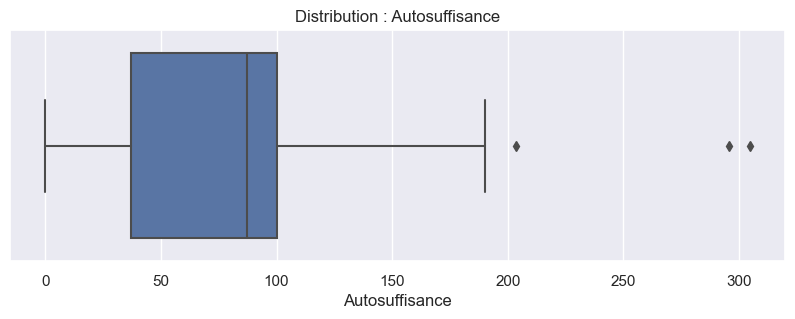



Valeur minimale : 0.0
Valeur maximale : 304.60526315789474
Moyenne : 77.10365518649353)
Médiane : 49.46616057594698


Ecart interquatile = 63.13
Seuil minimum = -57.82
Seuil maximum = 194.69
Nombre d'outliers: 3
['Belgique', 'Pays-Bas', 'Pologne']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Autosuffisance suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [33]:
univariée(df,'Autosuffisance')

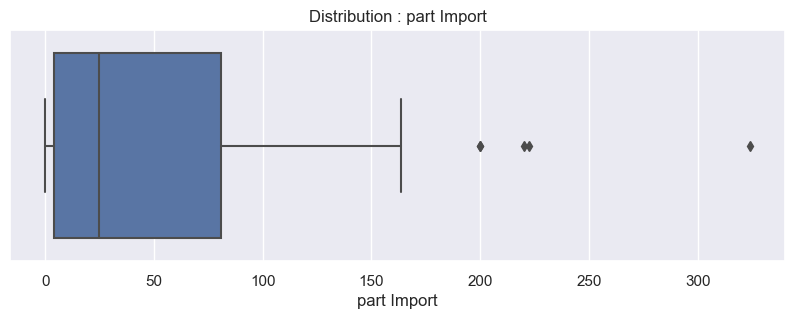



Valeur minimale : 0.0
Valeur maximale : 323.92857142857144
Moyenne : 45.80381132159717)
Médiane : 51.8500213550966


Ecart interquatile = 76.41
Seuil minimum = -110.37
Seuil maximum = 195.25
Nombre d'outliers: 5
['Belgique', 'Chine - RAS de Hong-Kong', 'Gambie', 'Timor-Leste', 'Îles Salomon']
-----------------------------------
HO du test de Shapiro-Wilk : la variable part Import suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [34]:
univariée(df,'part Import')

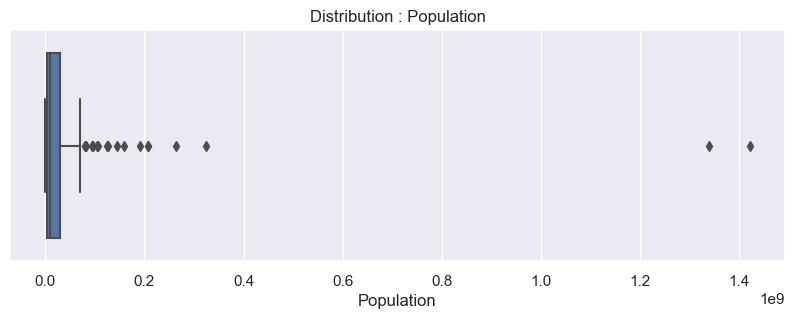



Valeur minimale : 52045.0
Valeur maximale : 1421021791.0
Moyenne : 42841754.66860465)
Médiane : 153063712.47403765


Ecart interquatile = 27264255.75
Seuil minimum = -38021903.38
Seuil maximum = 71035119.62
Nombre d'outliers: 18
['Allemagne', 'Bangladesh', 'Brésil', 'Chine, continentale', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Japon', 'Mexique', 'Nigéria', 'Pakistan', 'Philippines', 'Turquie', 'Viet Nam', 'Égypte', "États-Unis d'Amérique", 'Éthiopie']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Population suit une distribution normale
Stat : 0.23857861757278442
P-value =  4.011599291701069e-26
Rejet de H0


In [35]:
univariée(df,'Population')

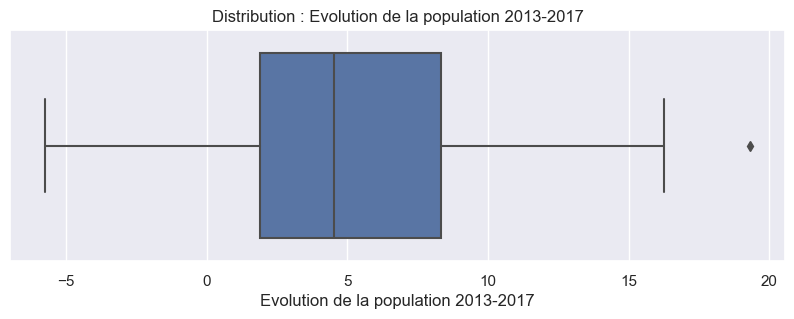



Valeur minimale : -5.746791152359551
Valeur maximale : 19.31281408542952
Moyenne : 4.982003318591727)
Médiane : 4.433962185532311


Ecart interquatile = 6.46
Seuil minimum = -7.82
Seuil maximum = 18.03
Nombre d'outliers: 1
['Oman']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Evolution de la population 2013-2017 suit une distribution normale
Stat : 0.9870215058326721
P-value =  0.11314565688371658
Acceptation de H0


In [36]:
univariée(df,'Evolution de la population 2013-2017')

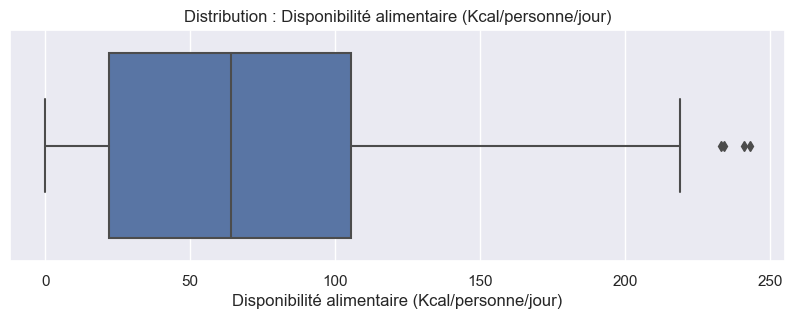



Valeur minimale : 0.0
Valeur maximale : 243.0
Moyenne : 74.55813953488372)
Médiane : 60.57127735951151


Ecart interquatile = 83.5
Seuil minimum = -103.25
Seuil maximum = 230.75
Nombre d'outliers: 4
['Antigua-et-Barbuda', 'Israël', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Disponibilité alimentaire (Kcal/personne/jour) suit une distribution normale
Stat : 0.912584125995636
P-value =  1.311306530027423e-08
Rejet de H0


In [37]:
univariée(df,'Disponibilité alimentaire (Kcal/personne/jour)')

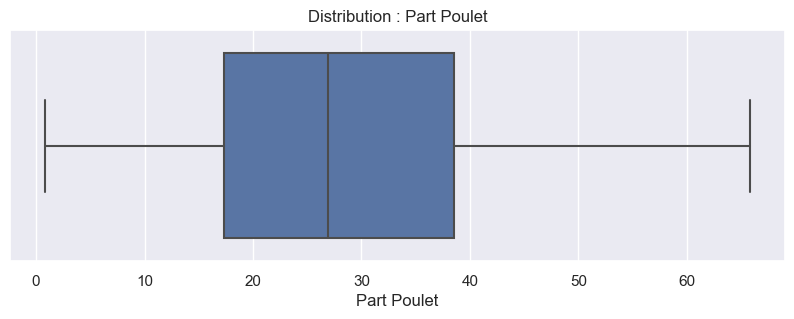



Valeur minimale : 0.8431703204047218
Valeur maximale : 65.81017304667016
Moyenne : 28.026997020626368)
Médiane : 15.076949307809214


Ecart interquatile = 21.22
Seuil minimum = -14.5
Seuil maximum = 70.4
Nombre d'outliers: 0
[]
-----------------------------------
HO du test de Shapiro-Wilk : la variable Part Poulet suit une distribution normale
Stat : 0.980658769607544
P-value =  0.016967400908470154
Rejet de H0


In [38]:
univariée(df,'Part Poulet')

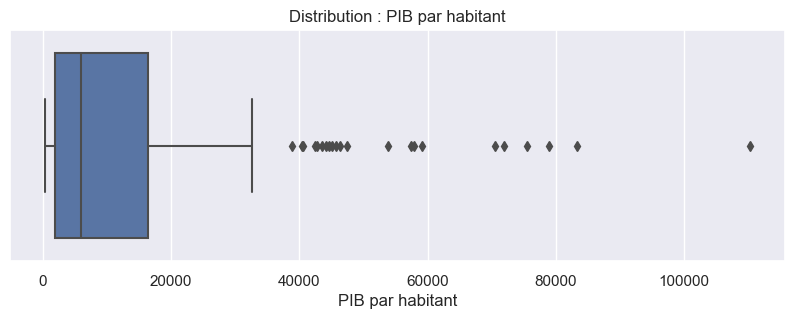



Valeur minimale : 414.740323
Valeur maximale : 110203.008202
Moyenne : 13761.161947829412)
Médiane : 19127.724806160288


Ecart interquatile = 14417.87
Seuil minimum = -19684.57
Seuil maximum = 37986.92
Nombre d'outliers: 22
['Allemagne', 'Australie', 'Autriche', 'Belgique', 'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Danemark', 'Finlande', 'France', 'Irlande', 'Islande', 'Israël', 'Japon', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suisse', 'Suède', 'Émirats arabes unis', "États-Unis d'Amérique"]
-----------------------------------
HO du test de Shapiro-Wilk : la variable PIB par habitant suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [39]:
univariée(df,'PIB par habitant')

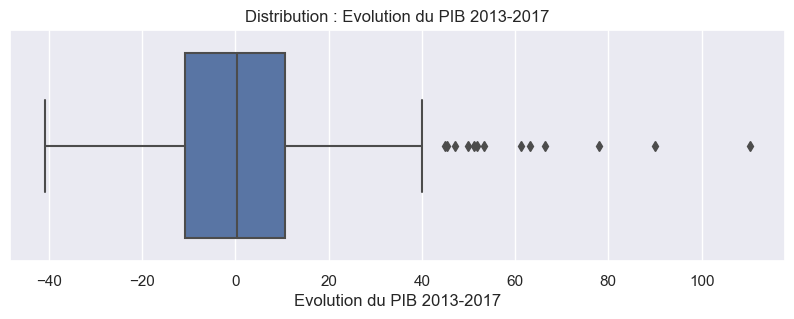



Valeur minimale : -40.80306355662795
Valeur maximale : 110.33552696219586
Moyenne : 3.906594872718153)
Médiane : 23.39930232588743


Ecart interquatile = 21.5
Seuil minimum = -43.16
Seuil maximum = 42.82
Nombre d'outliers: 13
['Azerbaïdjan', 'Congo', 'Fédération de Russie', 'Kazakhstan', 'Koweït', 'Mozambique', 'Nigéria', 'Sierra Leone', 'Suriname', 'Ukraine', 'Venezuela (République bolivarienne du)', 'Yémen', 'Égypte']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Evolution du PIB 2013-2017 suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [40]:
univariée(df,'Evolution du PIB 2013-2017')

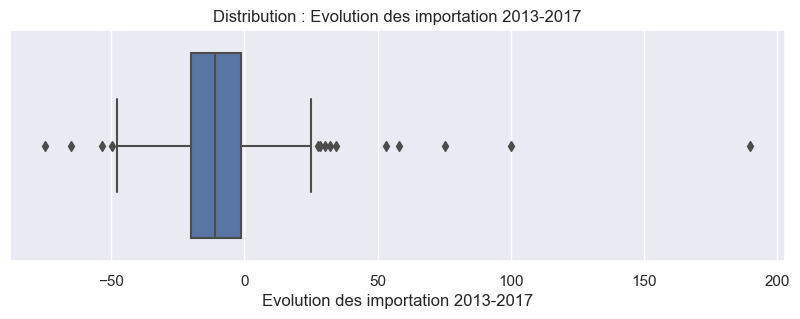



Valeur minimale : -74.73244894917276
Valeur maximale : 189.60440804708415
Moyenne : -8.70629923620408)
Médiane : 26.29124356522552


Ecart interquatile = 18.88
Seuil minimum = -48.3
Seuil maximum = 27.2
Nombre d'outliers: 14
['Albanie', 'Botswana', 'Bénin', 'Chine - RAS de Hong-Kong', 'Congo', 'Danemark', 'Gambie', 'Kenya', 'Kirghizistan', 'République centrafricaine', 'République-Unie de Tanzanie', 'Uruguay', 'Venezuela (République bolivarienne du)', 'Viet Nam']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Evolution des importation 2013-2017 suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [41]:
univariée(df,'Evolution des importation 2013-2017')

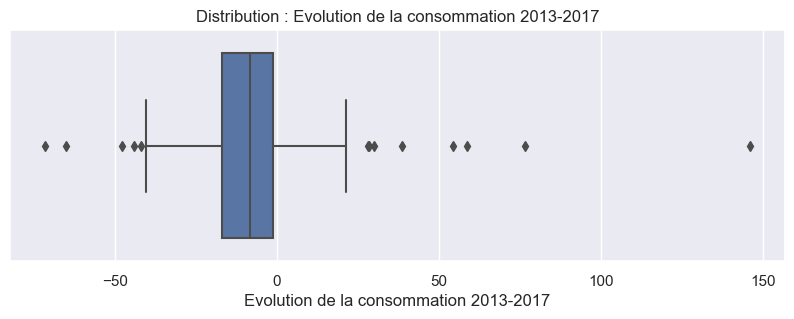



Valeur minimale : -71.49130310806957
Valeur maximale : 145.96588498436773
Moyenne : -7.334767648965045)
Médiane : 21.45186129929831


Ecart interquatile = 15.83
Seuil minimum = -40.66
Seuil maximum = 22.66
Nombre d'outliers: 13
['Albanie', 'Botswana', 'Bénin', 'Congo', 'Gambie', 'Kenya', 'Kirghizistan', 'Malawi', 'Mozambique', 'République-Unie de Tanzanie', 'Uruguay', 'Venezuela (République bolivarienne du)', 'Viet Nam']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Evolution de la consommation 2013-2017 suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [42]:
univariée(df,'Evolution de la consommation 2013-2017')

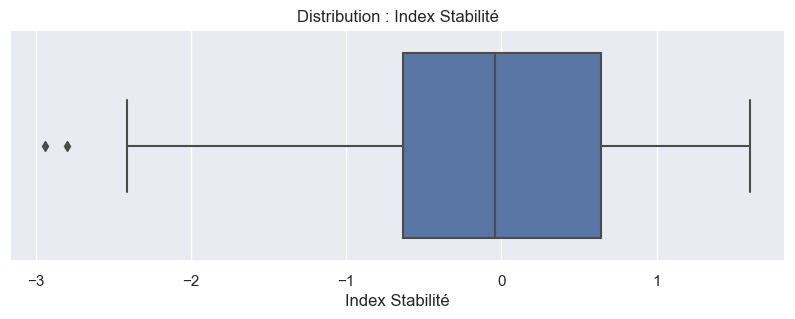



Valeur minimale : -2.94
Valeur maximale : 1.6
Moyenne : -0.07562874251497007)
Médiane : 0.9002493261810158


Ecart interquatile = 1.27
Seuil minimum = -2.55
Seuil maximum = 2.55
Nombre d'outliers: 2
['Afghanistan', 'Yémen']
-----------------------------------
HO du test de Shapiro-Wilk : la variable Index Stabilité suit une distribution normale
Stat : nan
P-value =  1.0
Acceptation de H0


In [43]:
univariée(df,'Index Stabilité')

Après évaluation, nous éliminons les variables qui ne suivent pas une distribution normale :
- 

2.2. Analyses Bivariées

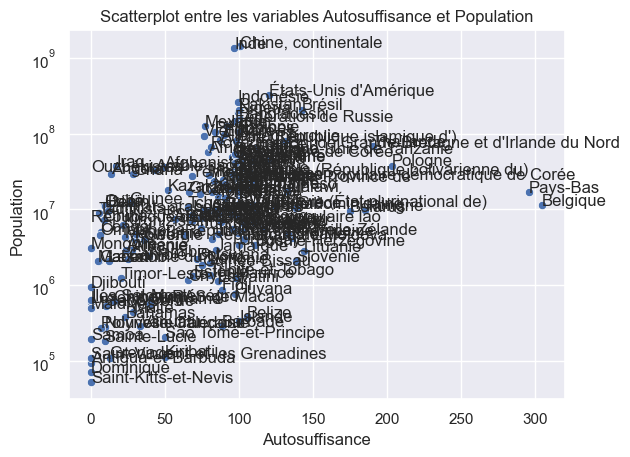

HO du test de Person : le coefficient de corrélation n'est pas significativement différent de zéro (il n'y a pas de relation linéaire) entre Autosuffisance et Population
Corr : 0.12502781322305082
P-value =  0.10221967182903195
Acceptation de H0


In [44]:
bivariée(df,'Autosuffisance','Population')

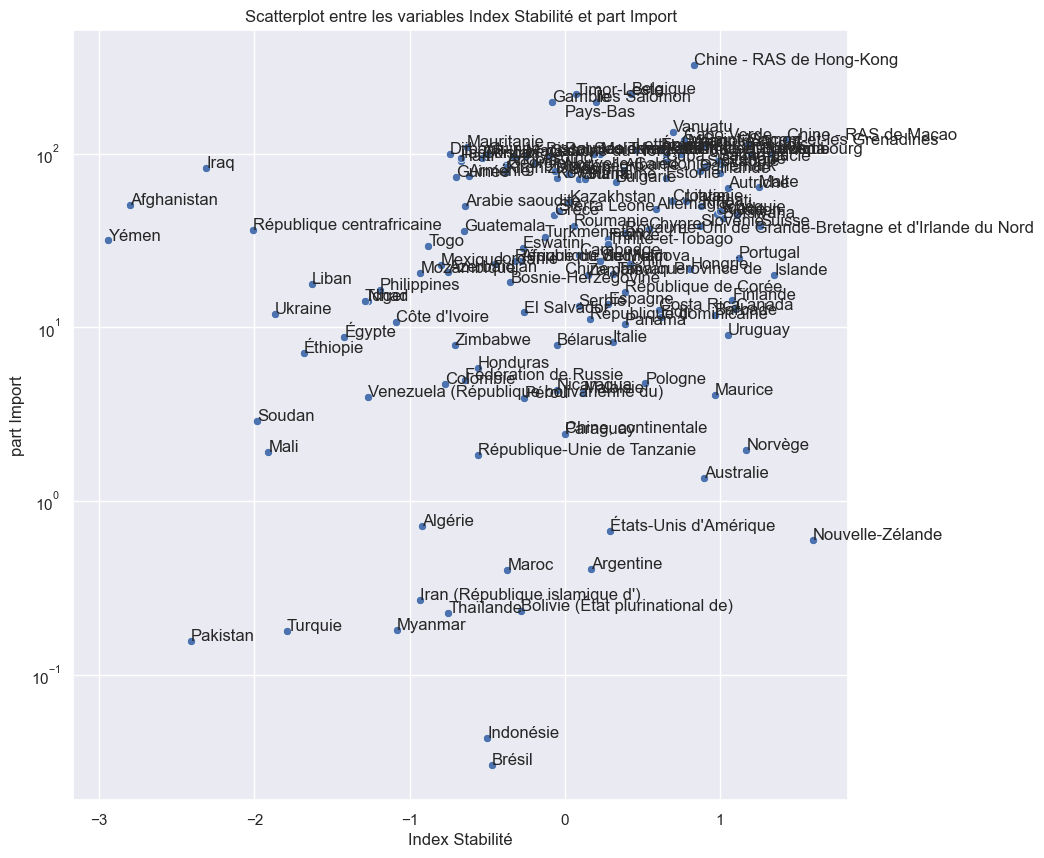

HO du test de Person : le coefficient de corrélation n'est pas significativement différent de zéro (il n'y a pas de relation linéaire) entre Index Stabilité et part Import
Corr : 0.2957998181103877
P-value =  8.16111181114808e-05
Rejet de H0


In [45]:
bivariée(df, 'Index Stabilité','part Import')

2.3. Matrice de Corréaltion

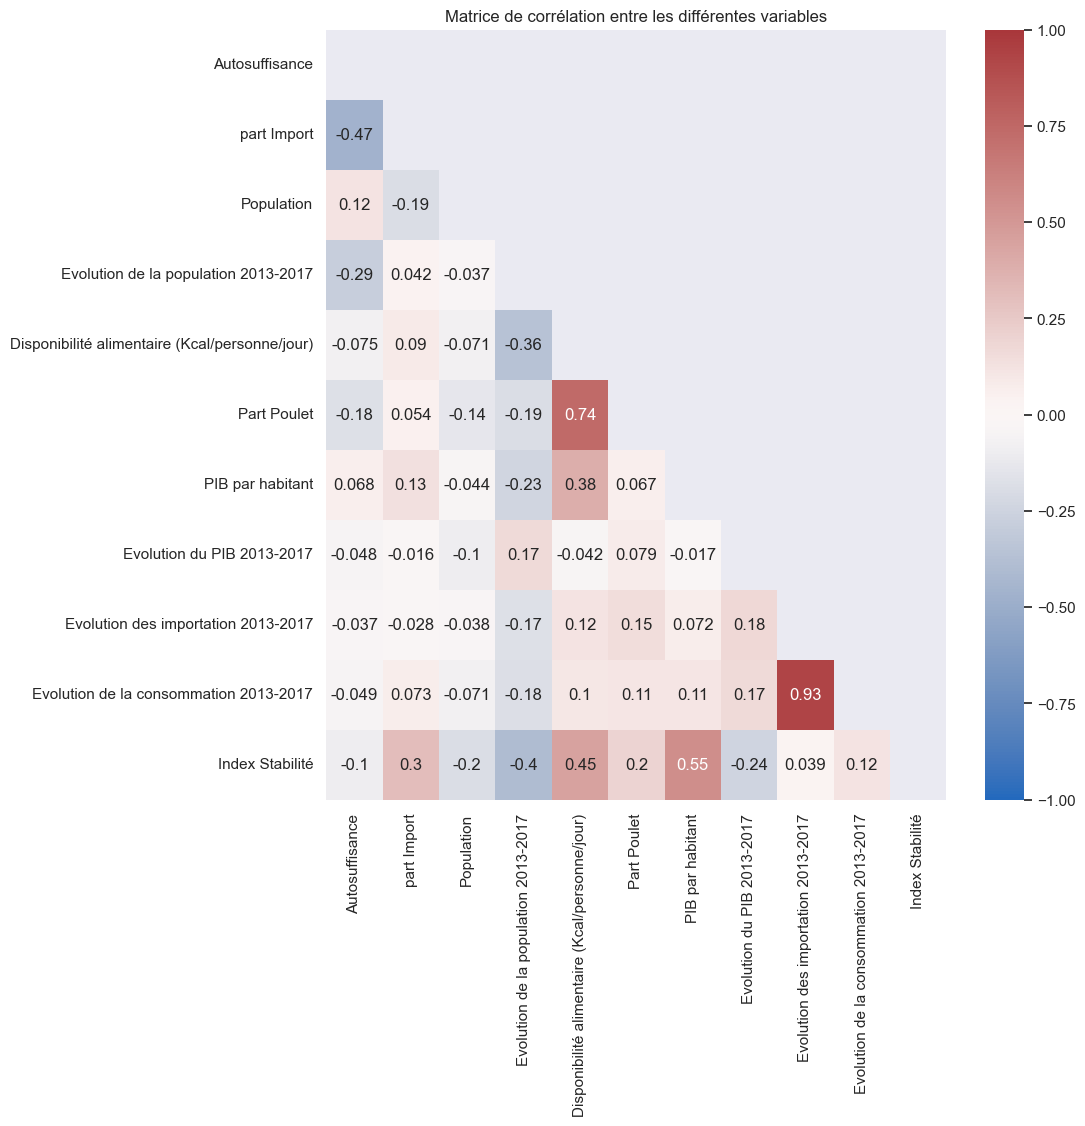

In [46]:
matrix = df.corr(method='pearson').round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Matrice de corrélation entre les différentes variables')
plt.show()

Nous allons garderons donc pour le clustering les variables suivantes :
- Autosuffisance
- part Import
- Evolution de la population 2013-2017
- PIB par habitant
- Evolution des importation 2013-2017